- **Project Name -IRIS FLOWER CLASSIFICATION**
- **Developed By - Aarchi Jain (aarchi0212@gmail.com)**
- **Branch Name- Information Technology**
- **Institute Name- Dr. Akhilesh Das Gupta Institute Of Technology And Management**
- **Submitted To - CodSoft**

## Problem Statement

**Task -3 (Iris Flower Classification )**

- The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

- Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Reading Data

In [2]:
df=sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is not any null value in this dataset.

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


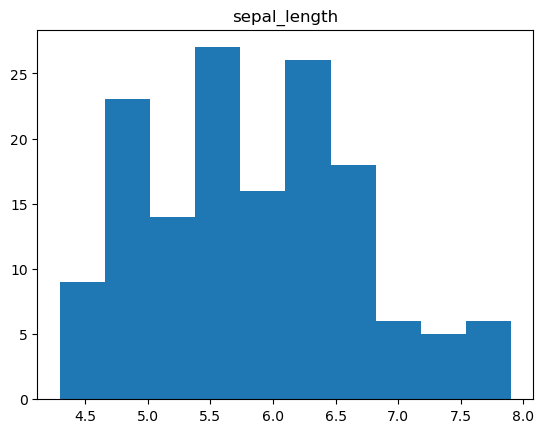

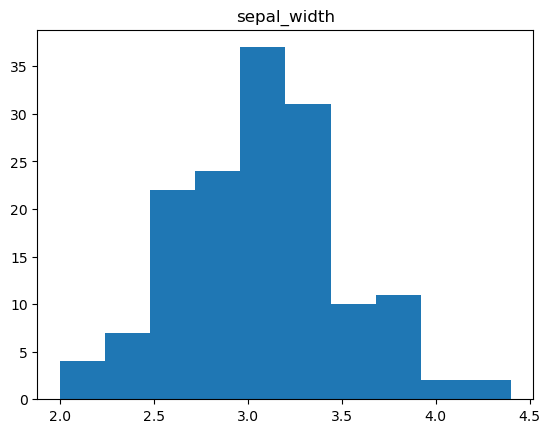

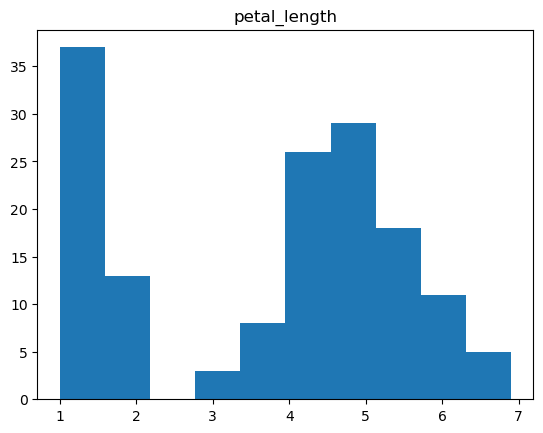

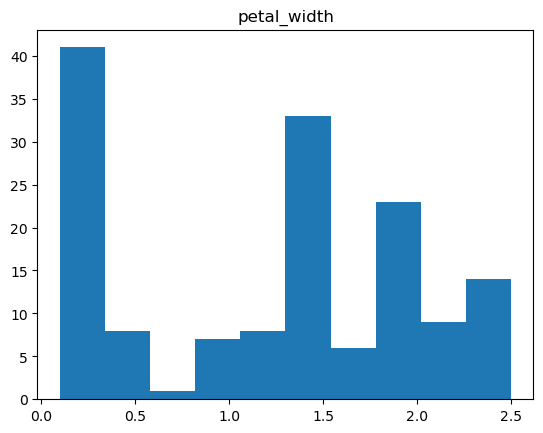

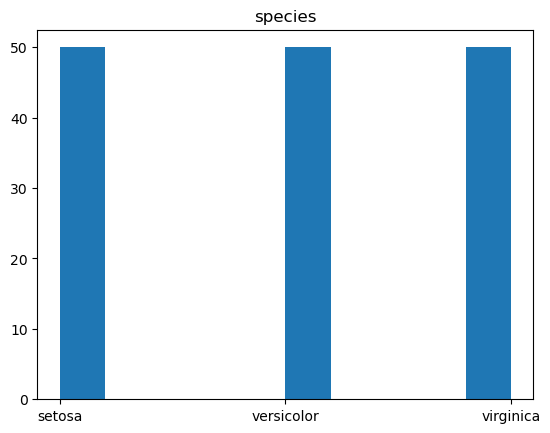

In [8]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

From the above graph we can infere that:
1. maximum number of sepal length is (5.3-5.8).
2. maximum number of sepal width is (3.0-3.3).
3. maximum number of petal length is (1-1.5).
4. maximum number of petal width is (0-0.3).
5. Setosa, versicolor,virginica are of equal numbers.

C:\Users\HP\AppData\Local\Temp\ipykernel_23736\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

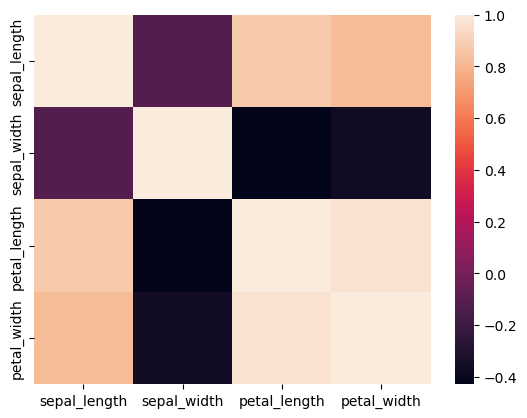

In [9]:
sns.heatmap(df.corr())

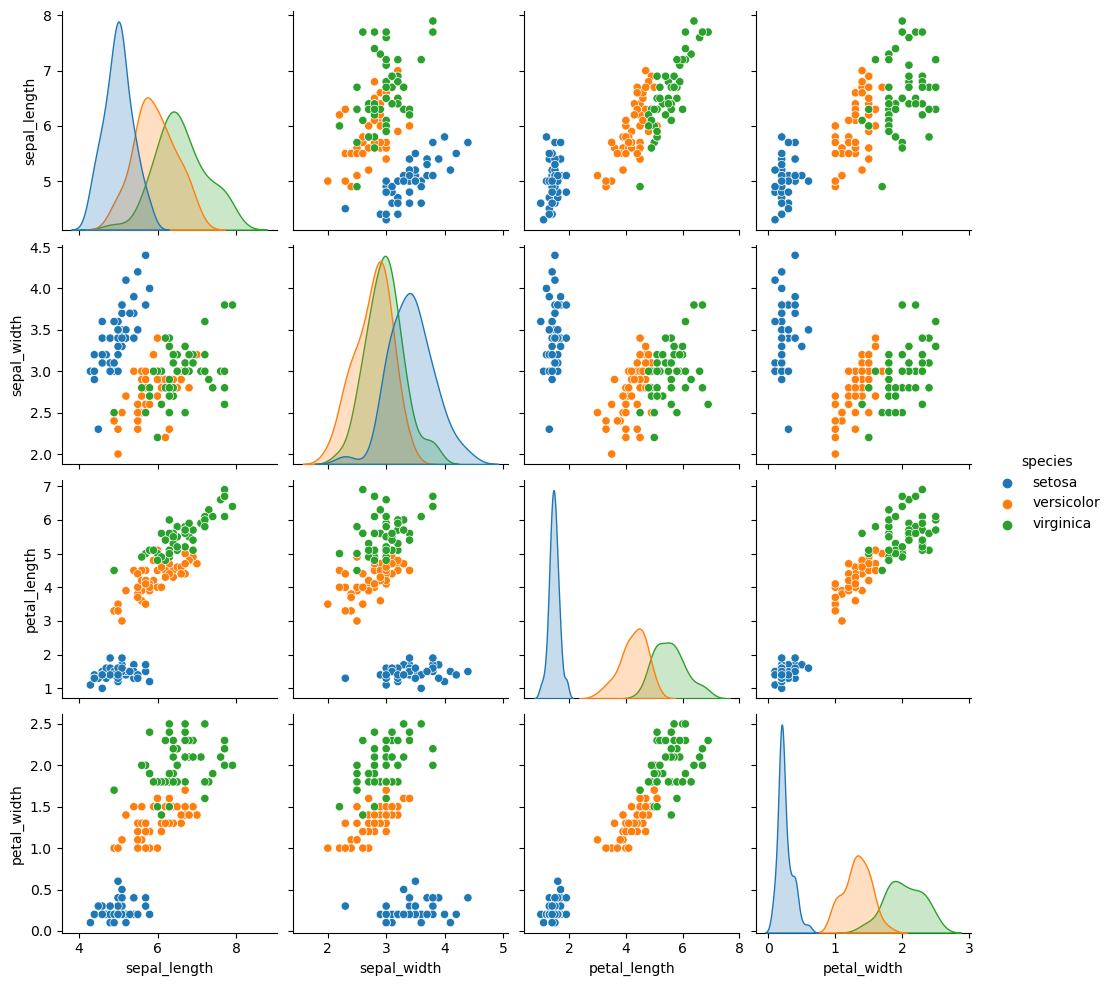

In [10]:
sns.pairplot(df, hue="species")

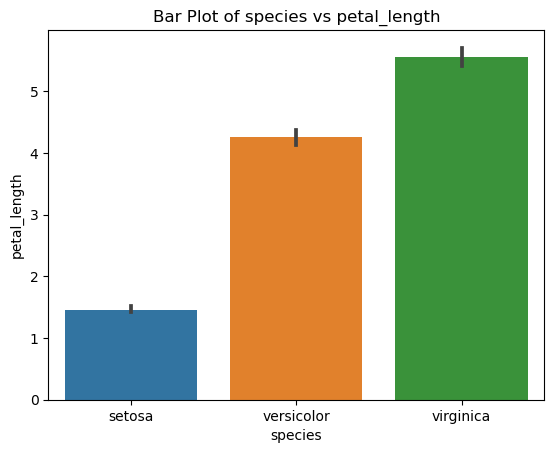

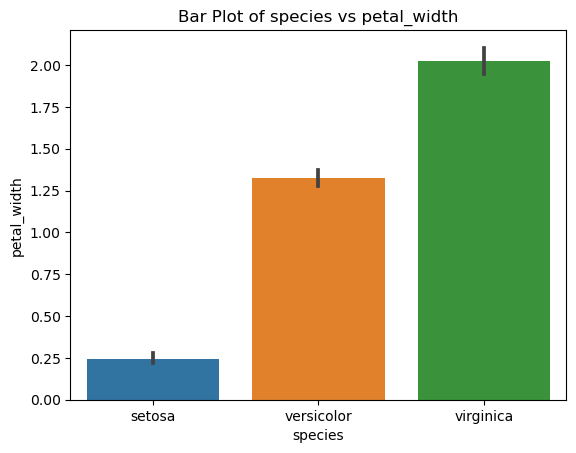

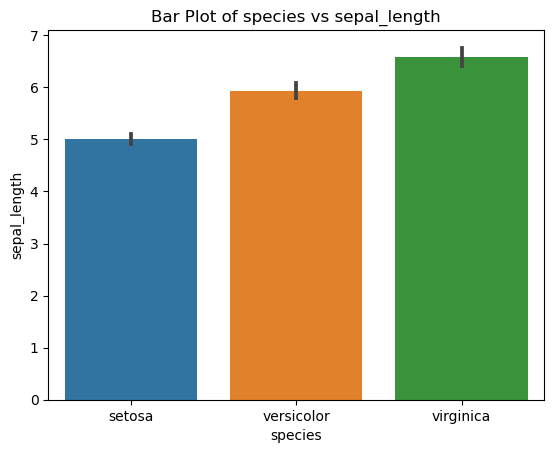

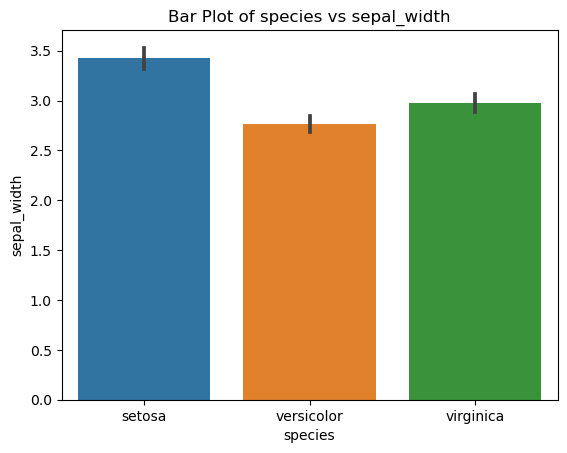

In [11]:
df_1=df[["petal_length","petal_width","sepal_length","sepal_width"]]
for cols in df_1.columns:
    sns.barplot(x=df["species"],y=df_1[cols])
    plt.title(f'Bar Plot of species vs {cols}')
    plt.xticks(rotation=0)
    plt.show()

1. As the petal_length of virginica is more so it is longest flower and setosa is smallest.
2. similarly petal_width of virginica is more.
3. sepal_length of virginica is more.
4. sepal_width of setosa is more 

## Data preprocessing for model

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df['species']=df['species'].map({'versicolor':0,'virginica':1,'setosa':2})

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


## Divide data into dependent and independent columns

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

## split data in train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predicate=log_reg.predict(X_train)
y_pred=log_reg.predict(X_test)

C:\Users\HP\anaconda3\AnacondaNEW\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_predicate, y_train))

0.9642857142857143


In [23]:
print(accuracy_score(y_pred,y_test))

1.0


## Fitting Naive bayes to training dataset

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
cla_x=classifier.predict(X_train)
cla=classifier.predict(X_test)

In [26]:
print(accuracy_score(cla_x,y_train))

0.9464285714285714


In [27]:
print(accuracy_score(cla,y_test))

1.0


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_train)
y_predict_test=classifier.predict(X_test)

In [30]:
print(accuracy_score(y_predict, y_train))

0.9464285714285714


In [31]:
print(accuracy_score(y_predict_test, y_test))

1.0


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
classi= DecisionTreeClassifier(max_depth=2)
classi.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [39, 38, 0]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [34, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [5, 37, 0]')]

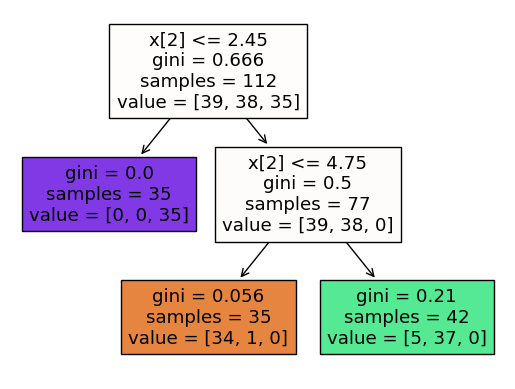

In [34]:
from sklearn import tree
tree.plot_tree(classi,filled=True)

In [35]:
y_predict=classi.predict(X_train)

In [36]:
y_predict_test=classi.predict(X_test)

In [37]:
print(accuracy_score(y_predict,y_train))

0.9464285714285714


In [38]:
print(accuracy_score(y_predict_test,y_test))

0.9736842105263158


## SVC

In [39]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred=classifier.predict(X_train)

In [41]:
y_pred_test=classifier.predict(X_test)

In [42]:
print(accuracy_score(y_pred,y_train))

0.9732142857142857


In [43]:
print(accuracy_score(y_pred_test,y_test))

1.0


**Accuracy of training model:**
1. Logistic Regression:- 96%
2. Naive bayes:- 94%
3. Random Forest:- 95%
4. Decision Tree:- 95%
5. SVC:- 97%

**Accuracy of testing model:**
1. Logistic Regression:- 97%
2. Naive bayes:- 100%
3. Random Forest:- 100%
4. Decision Tree:- 97%
5. SVC:- 100%

**This is very small dataset from every technique it is geeting best result but comparing by SVC we get best accuracy score for both Traing and testing.**